# Guessing games

## Guessing random number game

First we have a code that generates a random number, and lets us guess the solution:

Rules: 

* Guess a number
* If too high, I will tell so
* If too low, I will tell so
* Otherwise, great job! Try and use as few guesses as possible!

In [ ]:

### Initialize libraries
import random

## Seed randomness with current system time
random.seed()

## Range of numbers

N = 100

## Random number

R = random.randint(1,N)


## Initialize guesses
print("My number is between 1 and " + str(N) + ". Keep on guessing until correct!\n")

guess = -1 ## Initialize so as to not be correct


## While not correct
while guess != R :
    
    ##Prompt for new ones
    guess = int(input())
    
    ## Check answer
    if guess < R:
        ## If too low, tell so and try again
        print("\n Too low! Guess again! \n")
        
    elif guess >R:
        ## If too high, tell so and try again
        print("\n Too high! Guess again! \n")
        
    else:
        ## Otherwise must be equal, congratulate
        
        print("You're right, the correct answer is: "+ str(guess))
        

My number is between 1 and 100. Keep on guessing until correct!



In [6]:
print(R)


11


## Bisection search

Next, we implement bisection search, whose crucial idea is the same:

* At each step the search space, interval, is divided into half.



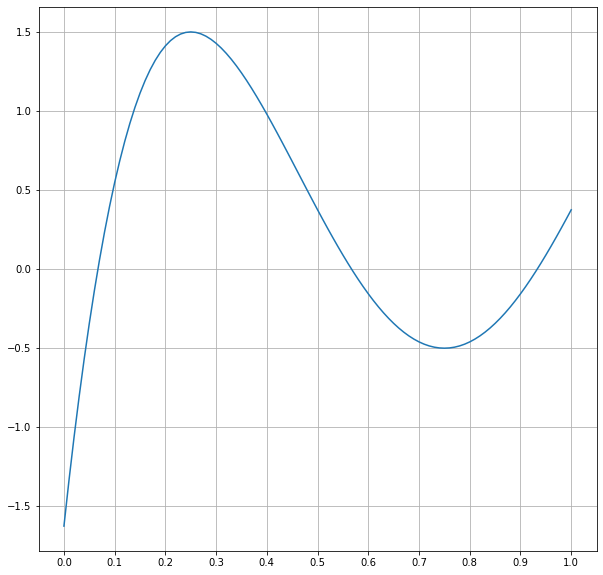

In [15]:
#### Plot function in a nice way
import matplotlib.pyplot as plt
import numpy as np



### Intermediate value function -32*(x-0.75)^4+16*(x-0.75)-0.5 
def my_fun(xs):
    
    
    if type(xs)==int or type(xs)==float:
        return -32.0*(xs-0.75)**4+16.0*(xs-0.75)**2-0.5
    
    else:
        return np.array([-32.0*(x-0.75)**4+16.0*(x-0.75)**2-0.5 for x in xs])


### Data
xs = np.linspace(0,1,101)
ys = my_fun(xs)

### Plotting 
plt.figure(figsize=(10, 10))
plt.plot(xs,ys)

## Make plot look nice
plt.xticks(np.linspace(0,1,11))
plt.grid(True)


This is a good function!

 Initiating bisection search... 

0.5
0.25
0.125
0.0625
0.09375
0.078125
0.0703125
0.06640625
0.068359375
0.0673828125
0.06689453125
0.067138671875
0.0670166015625
0.06695556640625
0.066986083984375
0.0670013427734375
0.06699371337890625
0.06698989868164062
0.06698799133300781


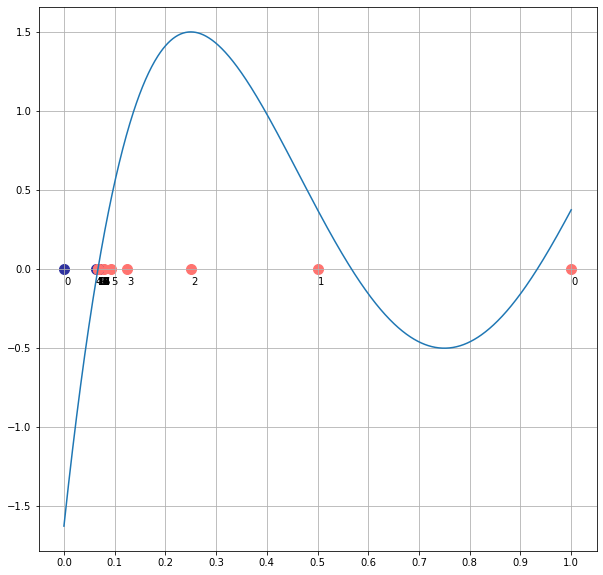

In [44]:
#### Bisection search:

######
## graphical_bisection does a graphical bisection search on a given function for a pre-determined number of steps
##
## fun is function, which returns a number of numpy array
## a,b are end points of interval we are searching
## N is the number of steps
#####

def graphical_bisection(fun,a,b,N):
    
    sign=1
    
    if fun(a)<0 and fun(b)>0:
        print("This is a good function!")
    
    elif fun(a)>0 and fun(b) < 0:
        print("To make my life easier, I will use minus fun, but otherwise all good")
        sign = -1
    
    else:
        ## IVT does not apply
        print("I am not confident your function has a zero.... Intermediate function theorem does not apply!")
        return None
    
    ### Data
    xs = np.linspace(a,b,1001)
    ys = sign*fun(xs)
    
    plt.figure(figsize=(10, 10))
    plt.plot(xs,ys)

    ## Make plot look nice
    plt.xticks(np.linspace(a,b,11))
    plt.grid(True)
    
    Left = float(a)
    Right = float(b)
    
    plt.scatter(Left,0,c=['#2F329F'], s=100)
    plt.text(Left,-.1,str(0))
    
    plt.scatter(Right,0,c=['#FF736F'], s=100)
    plt.text(Right,-.1,str(0))
    
    print("\n Initiating bisection search... \n")
    for i in range(1,N):
        
        mid_point = (Left+Right)/2
        print(mid_point)
        
        ##Maintain the interval which has f(left)<0 and f(right)>0
        
        value_fun_midpoint = sign*fun(mid_point)
        
        if value_fun_midpoint < 0:
            Left = mid_point
            
            plt.scatter(Left,0,c=['#2F329F'], s=100)
            plt.text(Left,-.1,str(i))
        else:
            Right = mid_point
            
            plt.scatter(Right,0,c=['#FF736F'], s=100)
            plt.text(Right,-.1,str(i))
            
        
    
    
graphical_bisection(my_fun,0,1,20)

This is a good function!

 Initiating bisection search... 

7.0685834705770345
10.602875205865551
12.370021073509811
13.253594007331941
13.695380474243006
13.916273707698537
14.026720324426304
13.97149701606242
13.94388536188048
13.930079534789508
13.923176621244021
13.926628078016765
13.928353806403138
13.927490942209952
13.927922374306544
13.927706658258248
13.927814516282396
13.927760587270322
13.927733622764286


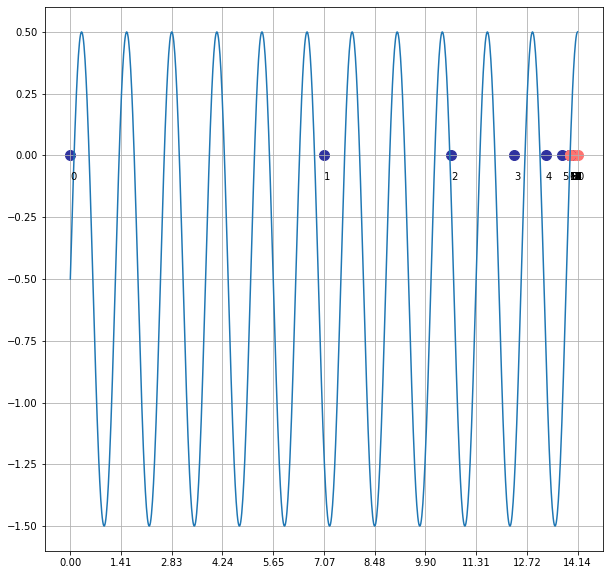

In [45]:
### Intermediate value function -32*(x-0.75)^4+16*(x-0.75)-0.5 
def sinusoid(xs):
    
    
    if type(xs)==int or type(xs)==float:
        return np.sin(xs*5)-.5
    
    else:
        return np.array([np.sin(x*5)-.5 for x in xs])

graphical_bisection(sinusoid,0,4.5*np.pi,20)